In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/Aya Zaoui/Downloads/titanic-passengers.csv",sep=";")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
del df['Age']

In [7]:
df.drop('Cabin',axis=1, inplace=True)

In [8]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [9]:
df

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,1,0,F.C. 12750,52.0000,S
...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,1,0,237736,30.0708,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,0,0,2669,7.2292,C
888,535,No,3,"Cacic, Miss. Marija",female,0,0,315084,8.6625,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,0,0,349215,7.8958,S


In [10]:
df.dropna(subset=['Embarked'],axis=0,inplace=True)

In [11]:
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    object 
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 76.4+ KB


In [13]:
df['Survived']=df['Survived'].map({"No":0,"Yes":1})


from sklearn.preprocessing import LabelEncoder
sex_le=LabelEncoder()
df['Sex']=sex_le.fit_transform(df['Sex'])
emb_le=LabelEncoder()
df['Embarked']=emb_le.fit_transform(df['Embarked'])

df.drop(['Name','Ticket', 'PassengerId'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,2,1,0,0,13.0000,2
1,0,3,1,0,0,7.6500,2
2,0,3,1,0,0,7.8542,2
3,0,3,0,0,4,21.0750,2
4,0,1,1,1,0,52.0000,2


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt



In [15]:
X=df.drop('Survived',axis=1).values
Y=df['Survived'].values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.28)

In [20]:
logreg1 = LogisticRegression()   
logreg1.fit(X_train, Y_train)  
Y_pred  = logreg1.predict(X_test)   
print("Accuracy={}".format(logreg1.score(X_test, Y_test)))




Accuracy=0.7831325301204819


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

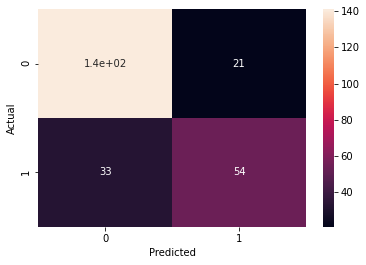

In [21]:
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)



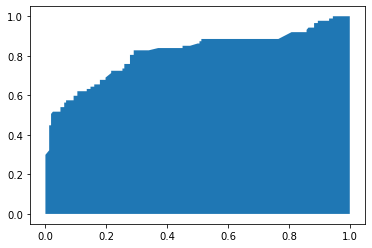

In [31]:
from sklearn.neighbors import KNeighborsClassifier
logreg2 = KNeighborsClassifier(n_neighbors=4)
logreg1 = LogisticRegression()   


logreg1.fit(X_train, Y_train)
logreg2.fit(X_train, Y_train)

pred_prob1 = logreg1.predict_proba(X_test)
pred_prob2 = logreg2.predict_proba(X_test)


from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(Y_test, pred_prob2[:,1], pos_label=1)


random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
plt.fill_between(fpr1, tpr1)

In [23]:
from sklearn.metrics import roc_auc_score


auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(Y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.8164467149141479 0.7698666099049241
